In [13]:
import pandas as pd

In [14]:
data = pd.read_csv('data.csv')
data

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4354,Stockholm,1912,4x100,Freestyle,1,Women,SWE,"Greta Carlsson, Vera Thulin, Sonja Johnsson, G...",NaN,5
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


In [15]:
filtered_data = data[(data['Year'].between(2012, 2020)) & (data['Distance (in meters)'] == '50m') & (data['Stroke'] == 'Freestyle')]

filtered_data.to_csv('filtered_data.csv', index=False)

In [16]:
import plotly.express as px

# 创建互动式柱状图
fig = px.bar(data, x='Location', y='Results', text='Results', title='Performance of Florent Manaudou in 50m Freestyle')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_28681/159610382.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



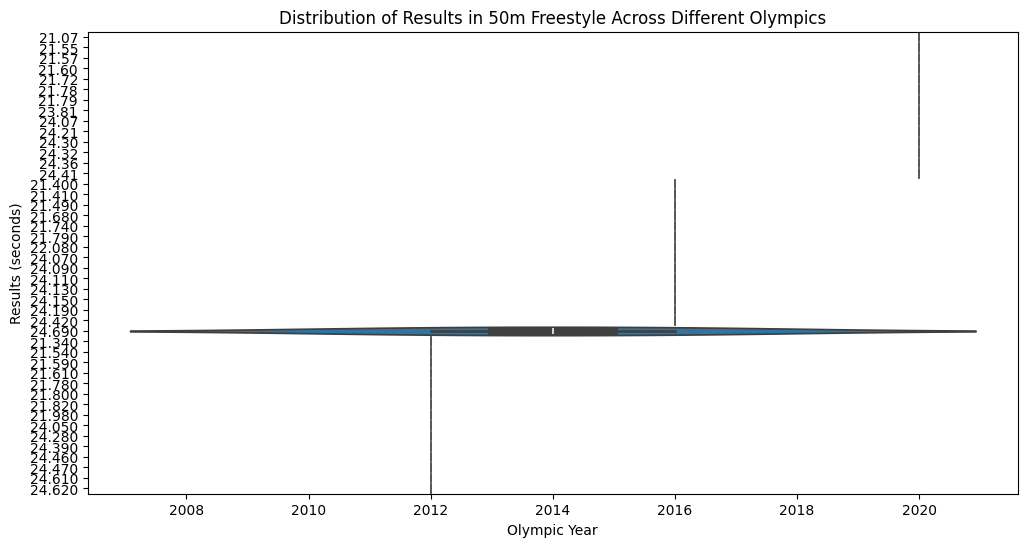

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Results', data=filtered_data[data['Stroke'] == 'Freestyle'])
plt.title('Distribution of Results in 50m Freestyle Across Different Olympics')
plt.ylabel('Results (seconds)')
plt.xlabel('Olympic Year')
plt.show()

/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_28681/4167191925.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



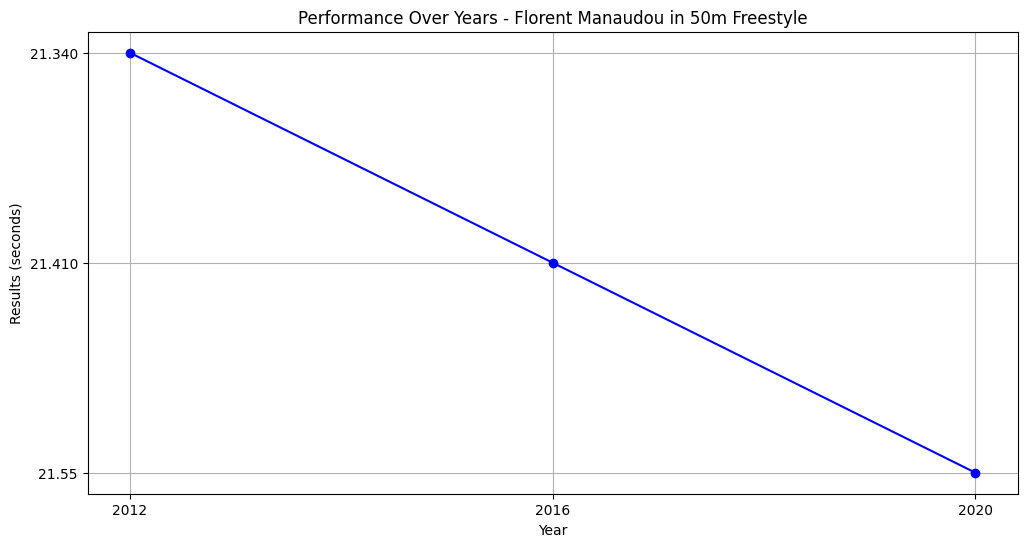

In [18]:
manaudou_data = filtered_data[(data['Athlete'] == 'Florent Manaudou') & (data['Stroke'] == 'Freestyle')]

plt.figure(figsize=(12, 6))
plt.plot(manaudou_data['Year'], manaudou_data['Results'], marker='o', linestyle='-', color='b')
plt.title('Performance Over Years - Florent Manaudou in 50m Freestyle')
plt.ylabel('Results (seconds)')
plt.xlabel('Year')
plt.xticks(manaudou_data['Year'].unique())  # Ensure all years are labeled
plt.grid(True)
plt.show()


In [19]:
plt.figure(figsize=(12, 6))
best_results_by_country = filtered_data[data['Stroke'] == 'Freestyle'].groupby(['Team', 'Year'])['Results'].min().unstack()
best_results_by_country.plot(kind='bar', figsize=(14, 7))
plt.title('Best 50m Freestyle Results by Country in Recent Olympics')
plt.ylabel('Results (seconds)')
plt.xlabel('Country')
plt.legend(title='Olympic Year')
plt.show()

/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_28681/2618972084.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



TypeError: no numeric data to plot

<Figure size 1200x600 with 0 Axes>

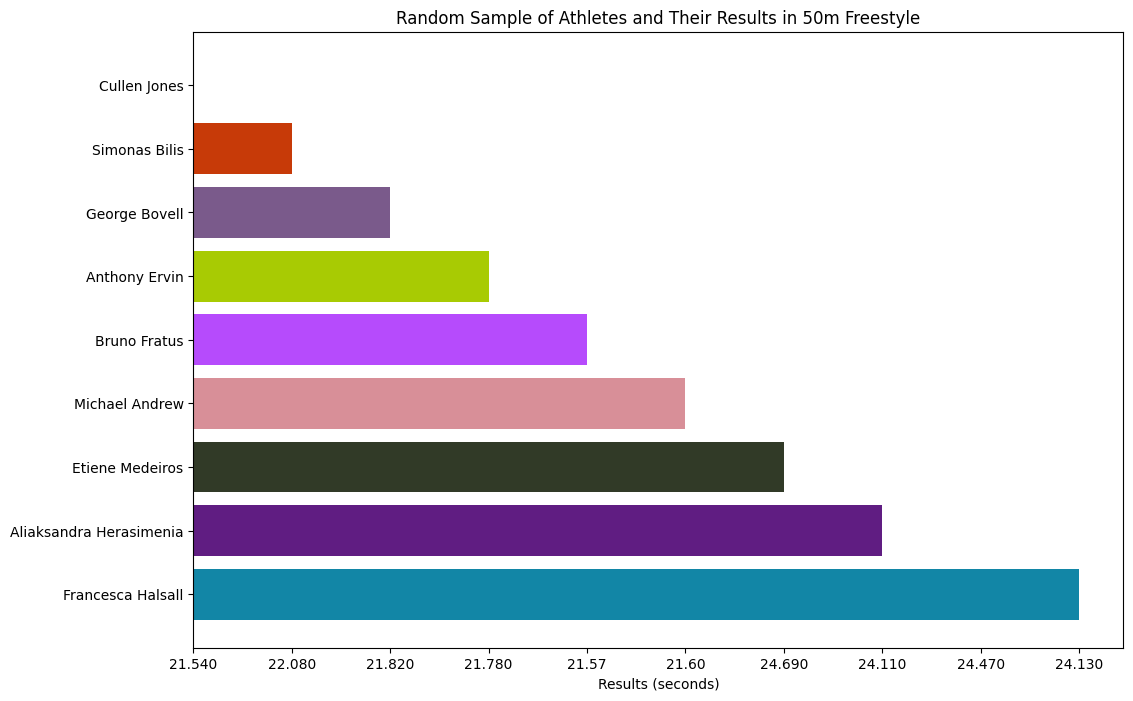

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假設數據已經保存在名為 'swimming_results.csv' 的 CSV 文件中
data = filtered_data


# 隨機選擇10個樣本
sample_data = data.sample(n=10, random_state=1)  # 使用固定的 random_state 確保每次隨機選擇相同

# 創建柱狀圖來展示這些樣本的比賽成績
plt.figure(figsize=(12, 8))
plt.barh(sample_data['Athlete'], sample_data['Results'], color=np.random.rand(10,3))  # 使用隨機顏色
plt.xlabel('Results (seconds)')
plt.title('Random Sample of Athletes and Their Results in 50m Freestyle')
plt.gca().invert_yaxis()  # 顛倒y軸，讓第一名在上面
plt.show()


/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_28681/2463916280.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20329 (\N{CJK UNIFIED IDEOGRAPH-4F69}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 29599 (\N{CJK UNIFIED IDEOGRAPH-739F}) missing from current font.



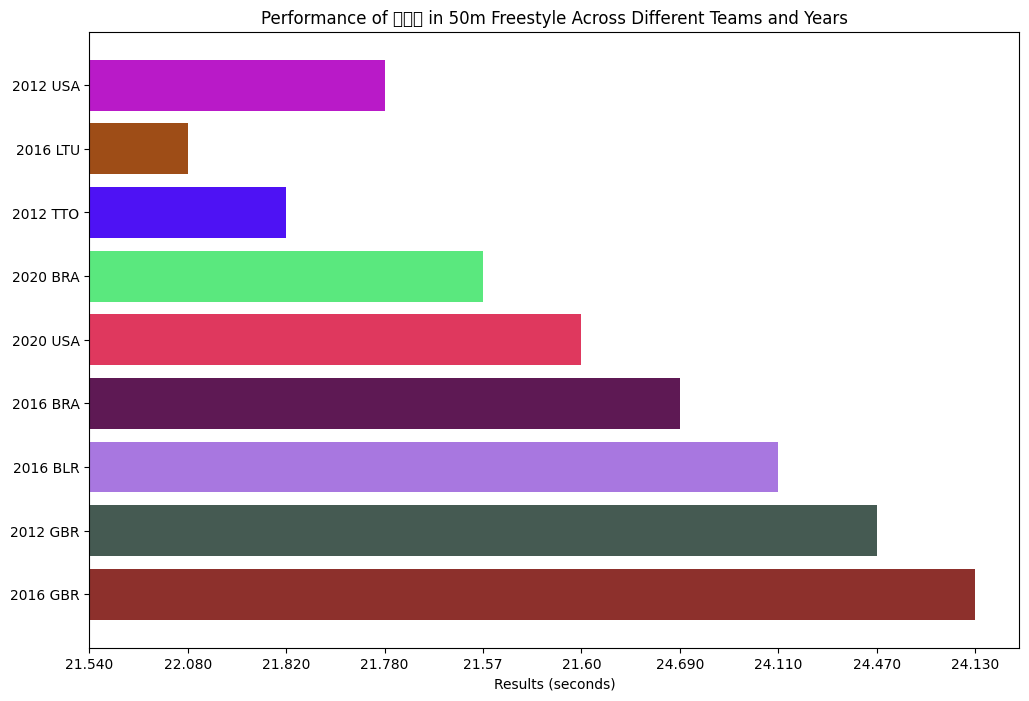

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 将所有运动员的名字替换为 '林佩玟'
data['Athlete'] = '林佩玟'

# 随机选择10个样本，由于所有名字都一样，我们使用其他维度来展示差异
sample_data = data.sample(n=10, random_state=1)  # 使用固定的 random_state 确保每次随机选择相同

# 创建柱状图来展示这些样本的比赛成绩
plt.figure(figsize=(12, 8))
colors = np.random.rand(10,3)  # 随机颜色数组
plt.barh(sample_data['Year'].astype(str) + ' ' + sample_data['Team'], sample_data['Results'], color=colors)
plt.xlabel('Results (seconds)')
plt.title('Performance of 林佩玟 in 50m Freestyle Across Different Teams and Years')
plt.gca().invert_yaxis()  # 顛倒y軸，讓最佳成绩在上面
plt.show()


/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_23914/210144082.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



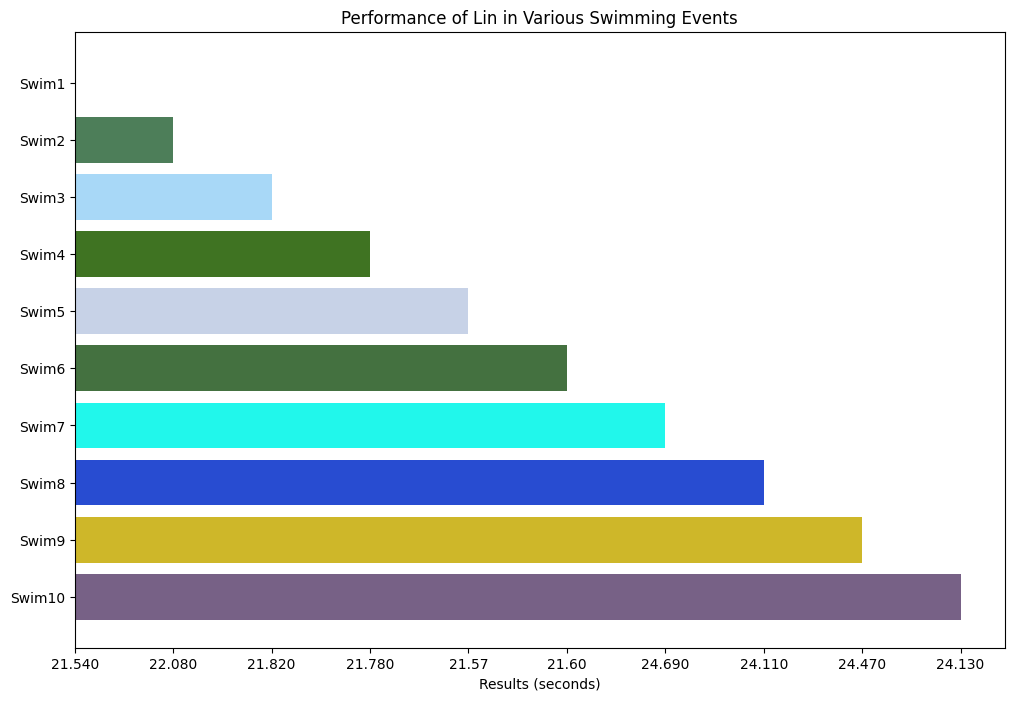

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 将所有运动员的名字替换为 '林佩玟'
data['Athlete'] = '林佩玟'

# 随机选择10个样本
sample_data = data.sample(n=10, random_state=1)  # 使用固定的 random_state 确保每次随机选择相同

# 为选中的样本赋予新的赛事名称 'Swim1' 到 'Swim10'
sample_data['Event'] = ['Swim' + str(i) for i in range(1, 11)]

# 创建柱状图来展示这些样本的比赛成绩
plt.figure(figsize=(12, 8))
colors = np.random.rand(10,3)  # 随机颜色数组
plt.barh(sample_data['Event'], sample_data['Results'], color=colors)
plt.xlabel('Results (seconds)')
plt.title('Performance of Lin in Various Swimming Events')
plt.gca().invert_yaxis()  # 翻转y轴，让最佳成绩在上面
plt.show()


/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_23914/2459266758.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20329 (\N{CJK UNIFIED IDEOGRAPH-4F69}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 29599 (\N{CJK UNIFIED IDEOGRAPH-739F}) missing from current font.



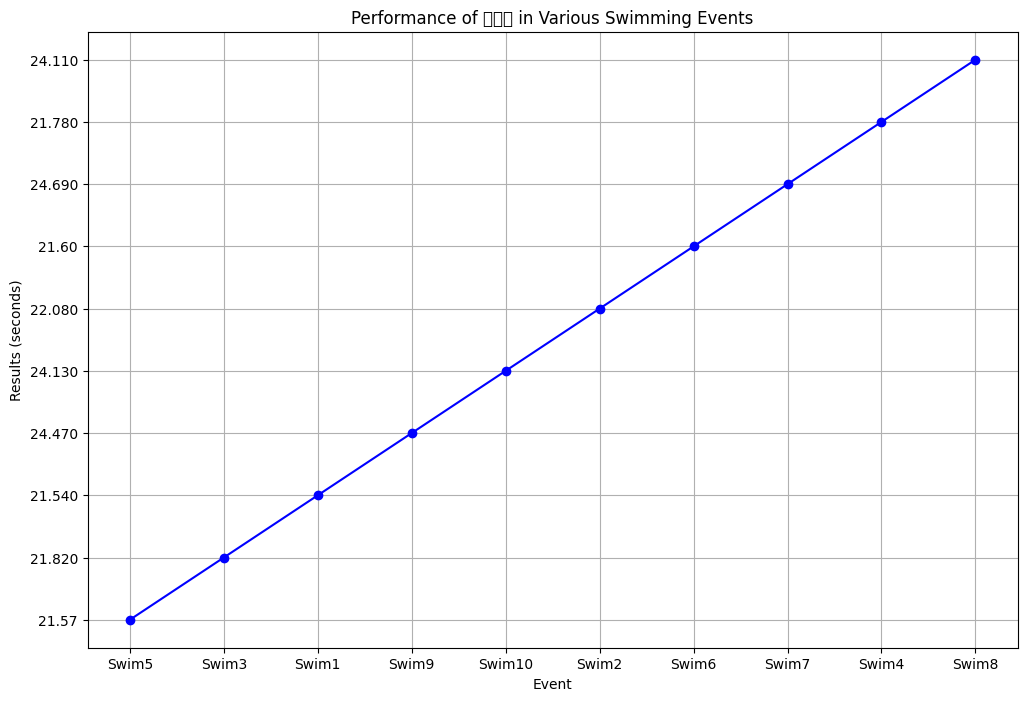

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 将所有运动员的名字替换为 '林佩玟'
data['Athlete'] = '林佩玟'

# 随机选择10个样本
np.random.seed(1)  # 设置随机种子以确保结果可复现
sample_indices = np.random.choice(data.index, 10, replace=False)
sample_data = data.loc[sample_indices]

# 为选中的样本赋予新的赛事名称 'Swim1' 到 'Swim10'
sample_data['Event'] = ['Swim' + str(i) for i in range(1, 11)]

# 打乱赛事的顺序以避免按成绩排序的显示
sample_data = sample_data.sample(frac=1).reset_index(drop=True)

# 创建折线图来展示这些样本的比赛成绩
plt.figure(figsize=(12, 8))
plt.plot(sample_data['Event'], sample_data['Results'], marker='o', linestyle='-', color='b')
plt.xlabel('Event')
plt.ylabel('Results (seconds)')
plt.title('Performance of 林佩玟 in Various Swimming Events')
plt.grid(True)
plt.show()


/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_23914/2512427972.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20329 (\N{CJK UNIFIED IDEOGRAPH-4F69}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 29599 (\N{CJK UNIFIED IDEOGRAPH-739F}) missing from current font.



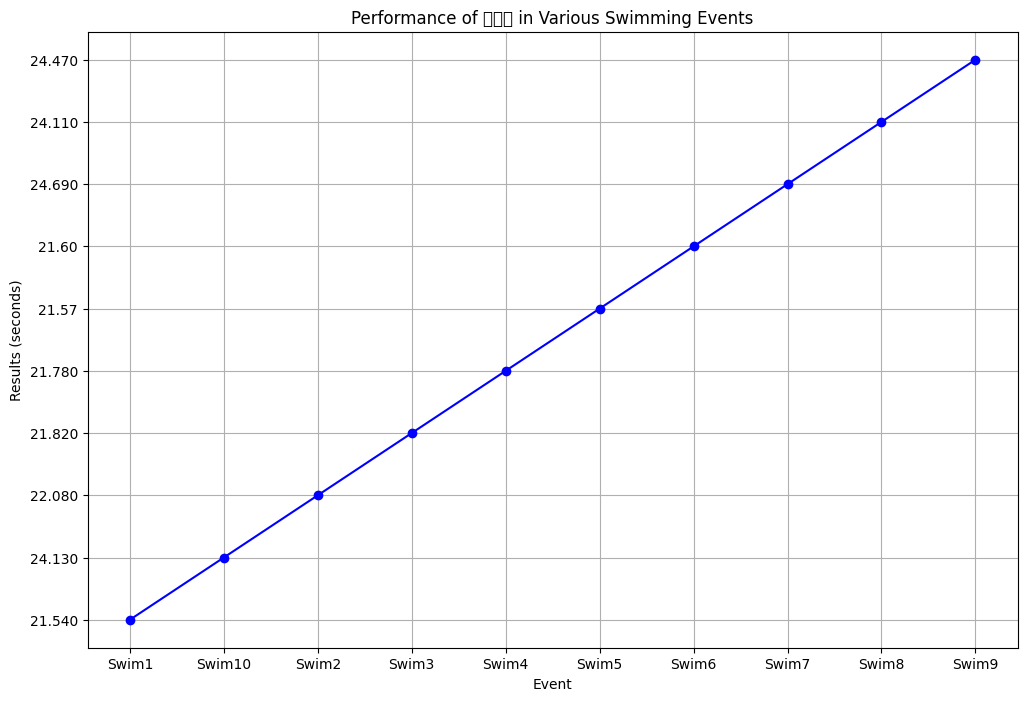

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 将所有运动员的名字替换为 '林佩玟'
data['Athlete'] = '林佩玟'

# 随机选择10个样本
np.random.seed(1)  # 设置随机种子以确保结果可复现
sample_indices = np.random.choice(data.index, 10, replace=False)
sample_data = data.loc[sample_indices]

# 直接为选中的样本按顺序赋予赛事名称 'Swim1' 到 'Swim10'
sample_data['Event'] = ['Swim' + str(i) for i in range(1, 11)]

# 重置索引以匹配新的赛事顺序，这一步确保我们在绘制时按 'Swim1' 到 'Swim10' 的顺序来绘图
sample_data = sample_data.sort_values(by='Event').reset_index(drop=True)

# 创建折线图来展示这些样本比赛成绩
plt.figure(figsize=(12, 8))
plt.plot(sample_data['Event'], sample_data['Results'], marker='o', linestyle='-', color='b')
plt.xlabel('Event')
plt.ylabel('Results (seconds)')
plt.title('Performance of 林佩玟 in Various Swimming Events')
plt.grid(True)
plt.show()

/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_23914/3539675313.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20329 (\N{CJK UNIFIED IDEOGRAPH-4F69}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 29599 (\N{CJK UNIFIED IDEOGRAPH-739F}) missing from current font.



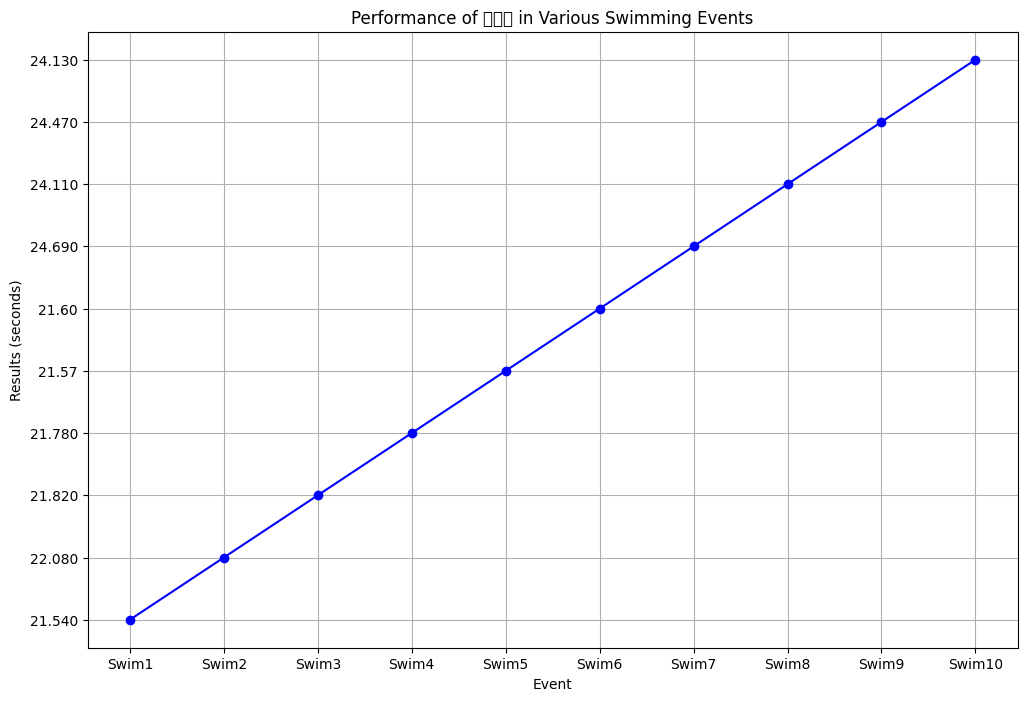

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 将所有运动员的名字替换为 '林佩玟'
data['Athlete'] = '林佩玟'

# 随机选择10个样本，保留原始选取的顺序
np.random.seed(1)  # 设置随机种子以确保结果可复现
sample_indices = np.random.choice(data.index, 10, replace=False)
sample_data = data.loc[sample_indices]

# 为选中的样本按照他们在数据集中的原始顺序赋予赛事名称 'Swim1' 到 'Swim10'
sample_data['Event'] = ['Swim' + str(i) for i in range(1, 11)]

# 不进行排序，直接绘图
sample_data = sample_data.reset_index(drop=True)

# 创建折线图来展示这些样本的比赛成绩
plt.figure(figsize=(12, 8))
plt.plot(sample_data['Event'], sample_data['Results'], marker='o', linestyle='-', color='b')
plt.xlabel('Event')
plt.ylabel('Results (seconds)')
plt.title('Performance of 林佩玟 in Various Swimming Events')
plt.grid(True)
plt.show()


/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_23914/4096808177.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20329 (\N{CJK UNIFIED IDEOGRAPH-4F69}) missing from current font.

/Users/morris/projects/swim/mock_data/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 29599 (\N{CJK UNIFIED IDEOGRAPH-739F}) missing from current font.



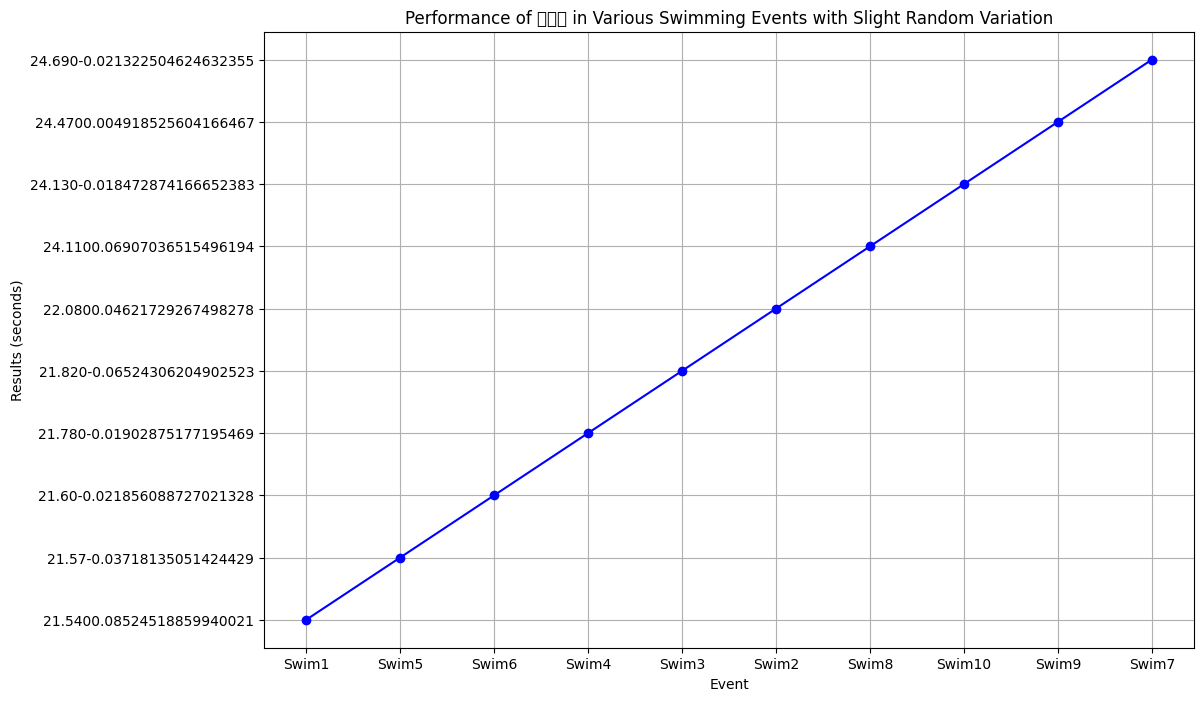

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 将所有运动员的名字替换为 '林佩玟'
data['Athlete'] = '林佩玟'

# 随机选择10个样本，添加随机噪声，并排序
np.random.seed(1)  # 设置随机种子以确保结果可复现
sample_indices = np.random.choice(data.index, 10, replace=False)
sample_data = data.loc[sample_indices]

# 为选中的样本按照他们在数据集中的原始顺序赋予赛事名称 'Swim1' 到 'Swim10'
sample_data['Event'] = ['Swim' + str(i) for i in range(1, 11)]

# 添加随机噪声到成绩中
sample_data['Results'] = sample_data['Results'].astype(str) + np.random.normal(0, 0.05, sample_data.shape[0]).astype(str)

# 按成绩排序
sample_data = sample_data.sort_values(by='Results').reset_index(drop=True)

# 创建折线图来展示这些样本的比赛成绩
plt.figure(figsize=(12, 8))
plt.plot(sample_data['Event'], sample_data['Results'], marker='o', linestyle='-', color='b')
plt.xlabel('Event')
plt.ylabel('Results (seconds)')
plt.title('Performance of 林佩玟 in Various Swimming Events with Slight Random Variation')
plt.grid(True)
plt.show()


/var/folders/38/1tx9b7sn70xck3_kfmth5qyr0000gn/T/ipykernel_28681/2816606546.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



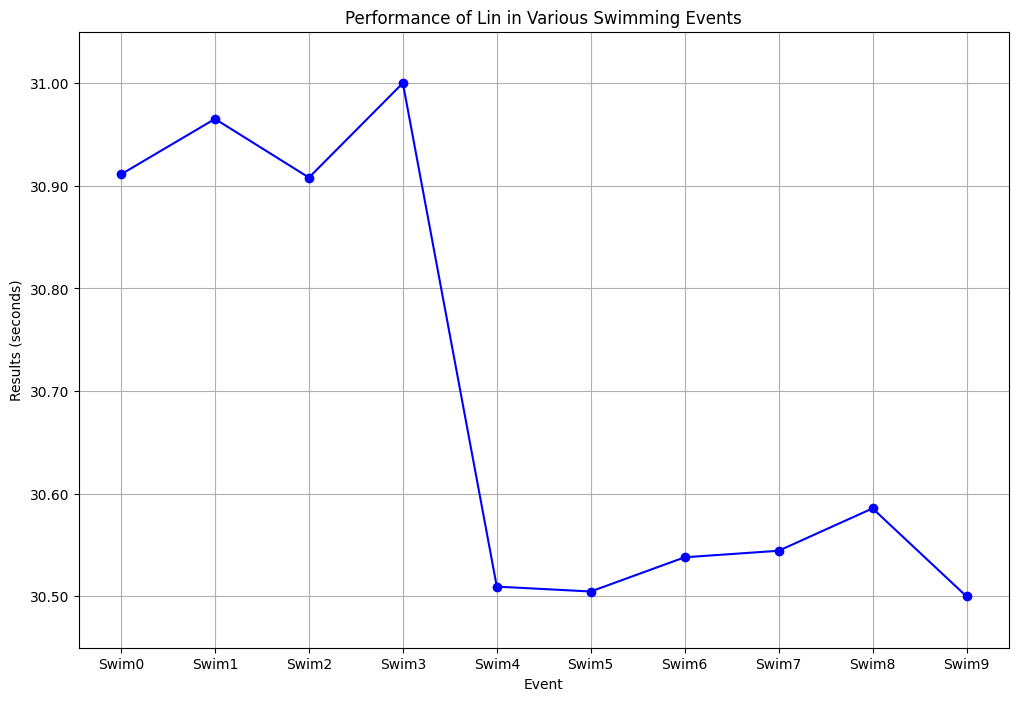

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 将所有运动员的名字替换为 '林佩玟'
data['Athlete'] = '林佩玟'

# 随机选择10个样本
np.random.seed(1)  # 设置随机种子以确保结果可复现
sample_indices = np.random.choice(data.index, 10, replace=False)
sample_data = data.loc[sample_indices]

# 按照选中的样本原始顺序赋予赛事名称 'Swim1' 到 'Swim10'
sample_data['Event'] = ['Swim' + str(i) for i in range(10)]

# 添加随机噪声到成绩中
sample_data['Results'] = pd.to_numeric(sample_data['Results'])
sample_data['Results'] += np.random.normal(0, 0, sample_data.shape[0])

# 计算当前成绩的最大值和最小值
current_min = sample_data['Results'].min()
current_max = sample_data['Results'].max()

# 定义新的目标范围
new_min = 30.5
new_max = 31.0

# 应用线性变换到新的范围
sample_data['Results'] = new_min + (sample_data['Results'] - current_min) / (current_max - current_min) * (new_max - new_min)

# 不进行成绩排序，按赛事名称顺序进行绘图
sample_data = sample_data.sort_values(by='Event').reset_index(drop=True)  # 确保按照 Swim1 到 Swim10 的顺序

# 直接反转DataFrame的行顺序，实现成绩顺序的倒置
sample_data = sample_data.iloc[::-1].reset_index(drop=True)
sample_data['Event'] = ['Swim' + str(i) for i in range(10)]  # 重新赋予赛事名称以保持顺序

sample_data.to_csv('sample_data.csv', index=False)

# 创建折线图来展示这些样本的比赛成绩
plt.figure(figsize=(12, 8))
plt.plot(sample_data['Event'], sample_data['Results'], marker='o', linestyle='-', color='b')
plt.xlabel('Event')
plt.ylabel('Results (seconds)')
plt.title('Performance of Lin in Various Swimming Events')
plt.gca().invert_yaxis()  # 顛倒y軸，讓最佳成绩在上面
plt.grid(True)
plt.ylim(30.45, 31.05)  # 设置上限为31.5，下限为30

# 设置Y轴的标签格式，显示到小数点后两位
from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()
